## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [0]:
import warnings
warnings.simplefilter('ignore')

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
students_data_original = pd.read_csv("/content/drive/My Drive/Great_Lakes_Assignments/Lab External | Residency 3/students-data.csv", delimiter=";")
print("File read successfully")

File read successfully


In [84]:
students_data_original.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
311,GP,F,19,U,GT3,T,2,1,at_home,other,other,other,3,2,0,no,yes,no,no,yes,no,yes,yes,3,4,1,1,1,2,20,14,12,13
81,GP,M,15,U,GT3,T,2,3,other,other,home,mother,1,3,0,yes,no,yes,no,no,yes,yes,no,5,3,2,1,2,5,4,11,10,11
189,GP,M,17,R,GT3,T,1,2,at_home,other,home,mother,1,2,0,no,no,no,no,yes,yes,no,no,3,1,3,1,5,3,4,8,9,10
76,GP,M,15,U,GT3,T,4,0,teacher,other,course,mother,2,4,0,no,no,no,yes,yes,yes,yes,no,3,4,3,1,1,1,8,11,11,10
190,GP,F,16,U,GT3,T,2,3,services,services,course,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,3,3,1,1,2,10,11,12,13
39,GP,F,15,R,GT3,T,2,2,at_home,other,reputation,mother,1,1,0,yes,yes,yes,yes,yes,yes,no,no,4,3,1,1,1,2,8,14,13,13
161,GP,M,15,R,GT3,T,3,2,other,other,course,mother,2,2,2,yes,yes,no,no,yes,yes,yes,yes,4,4,4,1,4,3,6,5,9,7
102,GP,M,15,U,GT3,T,4,4,services,other,course,mother,1,1,0,no,yes,no,yes,no,yes,yes,no,5,3,3,1,1,5,4,10,13,14
53,GP,F,15,U,GT3,T,4,4,services,services,course,mother,1,1,0,yes,yes,yes,no,yes,yes,yes,no,3,3,4,2,3,5,0,8,10,11
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [85]:
students_data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

##The above shows that there are no missing values in the data frame

In [86]:
students_data_original.shape

(395, 33)

In [87]:
students_data_original.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [88]:
students_data_original.index.name = 'number'
students_data_original.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [89]:
students_data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

###The are no missing values in the dataframe this step is already done above

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [90]:
# Finding out the categorical attributes
# From the above information we can see there are only two attributes available 'object' and 'int64' so we can exclude 'int64' to get all the available categorical attributes.
students_data_original.select_dtypes(exclude ='int64').dtypes

school        object
sex           object
address       object
famsize       object
Pstatus       object
Mjob          object
Fjob          object
reason        object
guardian      object
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
dtype: object

###Ans - From all the attributes the above are the attributes which are not numerical

## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [91]:
students_data_original.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [92]:
# Droping column whose var is less than 1, so we will drop 6 columns.
students_data = students_data_original.drop(["traveltime", "studytime", "failures","famrel","freetime","Dalc",], axis=1)
students_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,no,yes,no,no,no,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,no,yes,yes,no,yes,yes,no,no,2,2,5,4,6,10,10


In [93]:
students_data.shape

(395, 27)

### We can see that earlier there were 33 columns now only 27 are remaining

In [94]:
students_data.var()

age          1.628285
Medu         1.198445
Fedu         1.184180
goout        1.239388
Walc         1.658678
health       1.932944
absences    64.049541
G1          11.017053
G2          14.148917
G3          20.989616
dtype: float64

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [95]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in students_data.columns:
    if(students_data[col].dtype == "object"):
        students_data[col] = students_data[col].astype("category")
        students_data[col] = label_encoder.fit_transform(students_data[col])
print("Operation Completed")

Operation Completed


In [96]:
students_data.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,,,,,,,
378,1,0,18,1,0,1,3,3,2,2,1,1,0,0,1,0,1,1,1,1,3,2,1,0,15,15,15
147,0,0,15,1,0,1,1,2,0,2,0,1,0,1,1,0,0,1,1,0,2,1,5,2,10,11,11
228,0,1,18,1,1,1,2,1,0,2,0,1,1,1,1,1,1,1,1,1,2,5,3,14,10,8,9
103,0,0,15,1,0,1,3,2,3,2,1,1,1,1,1,0,1,1,1,0,5,1,2,26,7,6,6
182,0,0,17,1,0,1,2,4,3,3,3,0,0,1,0,1,1,1,0,0,2,3,5,0,16,17,17
279,0,1,18,1,1,1,4,3,4,3,0,1,0,0,1,1,1,1,1,0,3,2,1,8,10,11,10
53,0,0,15,1,0,1,4,4,3,3,0,1,1,1,1,0,1,1,1,0,4,3,5,0,8,10,11
146,0,0,15,1,0,1,3,2,1,3,1,0,0,1,0,0,1,1,1,0,2,1,3,0,6,7,0
292,0,0,18,1,1,1,2,1,3,0,3,1,0,0,0,0,1,1,1,1,3,1,5,12,12,12,13


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [0]:
students_data["G1"] = np.where(students_data["G1"]>=10, 1, 0)
students_data["G2"] = np.where(students_data["G2"]>=10, 1, 0)
students_data["G3"] = np.where(students_data["G3"]>=10, 1, 0)

In [98]:
students_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,0,1,1,0,0,0,1,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,0,0,0,1,0,0,0,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,1,1,0,1,1,1,1,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,1,0,0,1,1,0,1,1,0,0,2,2,5,4,0,1,1


In [99]:
students_data.shape

(395, 27)

## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [0]:
x = students_data.drop('G3', axis = 1)
y = students_data['G3']

In [101]:
x.shape

(395, 26)

In [102]:
y.shape

(395,)

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

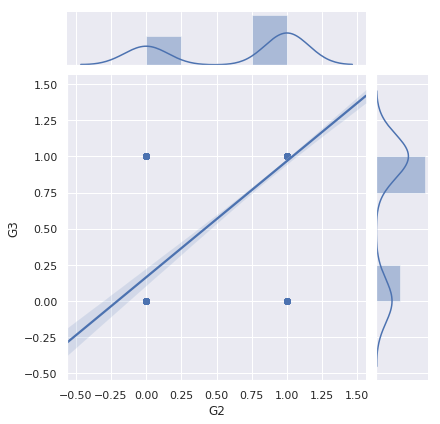

In [103]:
sns.jointplot("G2", "G3",data=students_data, kind="reg");


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

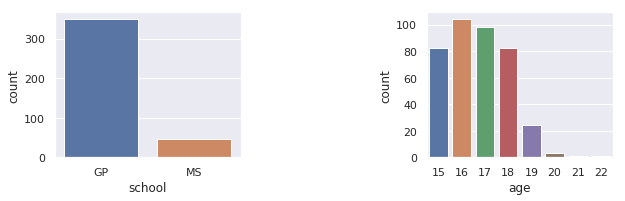

In [104]:
sns.set(rc={'figure.figsize':(10,8)})
plt.subplots_adjust(hspace=1, wspace=1)
sns.countplot(x=students_data_original['school'], ax=plt.subplot(2,2,1))
sns.countplot(x=students_data_original['age'], ax=plt.subplot(2,2,2));

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [108]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=300, random_state=5)
print("The train records are -", x_train.shape)
print("The test records are -", x_test.shape)

The train records are - (300, 26)
The test records are - (95, 26)


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [110]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import recall_score
students_mdl = LogisticRegression()
students_mdl.fit(x_train, y_train)
y_predict_train = students_mdl.predict(x_train)
y_predict = students_mdl.predict(x_test)
students_mdl_score_train = students_mdl.score(x_train, y_train)
students_mdl_score_test = students_mdl.score(x_test, y_test)

#Print the model trianing and testing accuracy, Also the f1 scores
print("Training Accuracy -",students_mdl_score_train)
print("Testing Acurracy -",students_mdl_score_test)
print("F1 Score - Training")
print(metrics.classification_report(y_train, y_predict_train))
print("F1 Score - Testing")
print(metrics.classification_report(y_test, y_predict))

Training Accuracy - 0.93
Testing Acurracy - 0.8947368421052632
F1 Score - Training
              precision    recall  f1-score   support

           0       0.87      0.92      0.89        97
           1       0.96      0.94      0.95       203

    accuracy                           0.93       300
   macro avg       0.92      0.93      0.92       300
weighted avg       0.93      0.93      0.93       300

F1 Score - Testing
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        33
           1       0.95      0.89      0.92        62

    accuracy                           0.89        95
   macro avg       0.88      0.90      0.89        95
weighted avg       0.90      0.89      0.90        95



# Naive bayes with Iris data

### Import Iris.csv

In [121]:
iris_original = pd.read_csv("/content/drive/My Drive/Great_Lakes_Assignments/Lab External | Residency 3/iris.csv")
print("File read successfully")

File read successfully


In [115]:
iris_original.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [117]:
iris_original.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,152.0,76.500000,44.022721,1.0,38.75,76.50,114.25,152.0
SepalLengthCm,151.0,5.843709,0.825314,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,151.0,1.202649,0.762185,0.1,0.30,1.30,1.80,2.5


In [118]:
iris_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    151 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     151 non-null float64
Species          152 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [0]:
# From the above we can see there are some null values in the datasets
## Coverting Null values to mean of the column
iris_original["SepalLengthCm"] = iris_original["SepalLengthCm"].fillna(iris_original["SepalLengthCm"].mean())
iris_original["SepalWidthCm"] = iris_original["SepalWidthCm"].fillna(iris_original["SepalWidthCm"].mean())
iris_original["PetalLengthCm"] = iris_original["PetalLengthCm"].fillna(iris_original["PetalLengthCm"].mean())
iris_original["PetalWidthCm"] = iris_original["PetalWidthCm"].fillna(iris_original["PetalWidthCm"].mean())

In [126]:
iris_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    152 non-null float64
SepalWidthCm     152 non-null float64
PetalLengthCm    152 non-null float64
PetalWidthCm     152 non-null float64
Species          152 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [0]:
X = iris_original.drop('Species', axis = 1)
y = iris_original['Species']

### Find the distribution of target variable (Class)

In [128]:
print(iris_original.groupby('Species').count())

                 Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                      
Iris-setosa      50             50            50             50            50
Iris-versicolor  50             50            50             50            50
Iris-virginica   52             52            52             52            52


### Plot the distribution of target variable using histogram

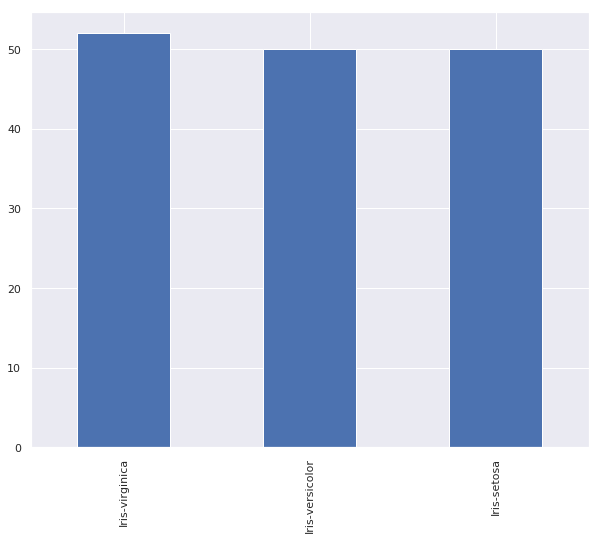

In [130]:
pd.value_counts(iris_original["Species"]).plot(kind="bar");

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

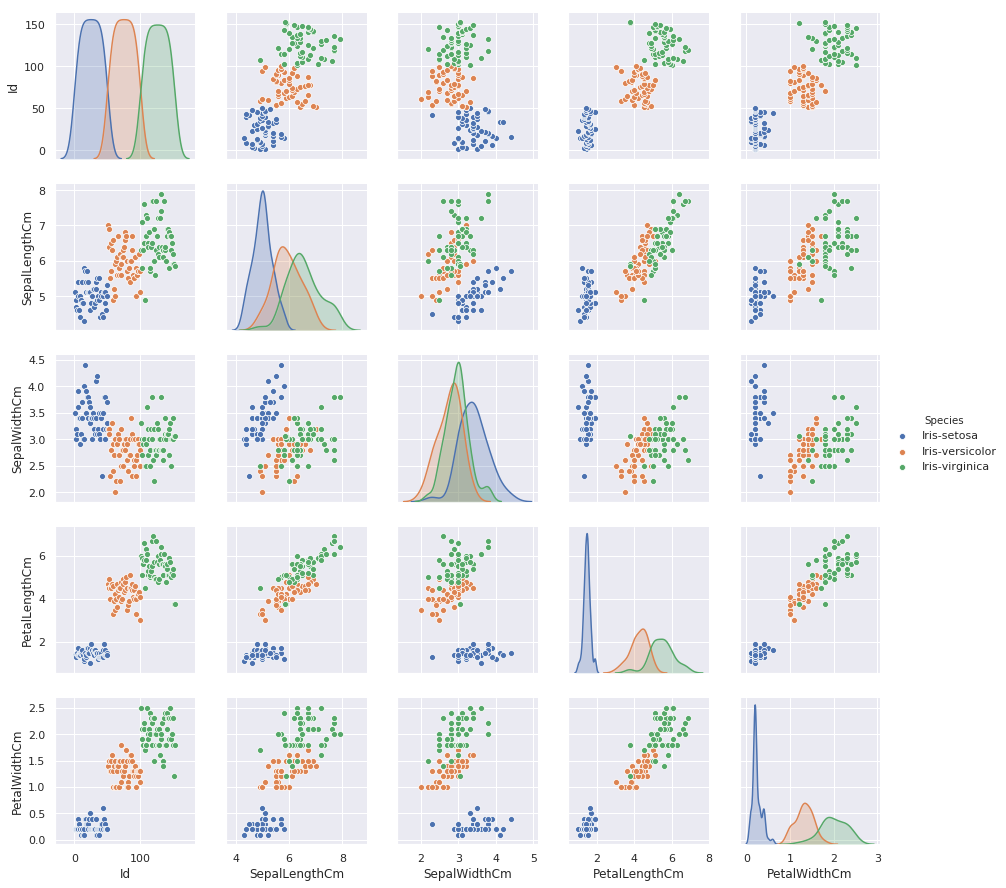

In [132]:
sns.pairplot(iris_original, diag_kind='kde',hue='Species');

Based on above pair plot we can say that
1. sepal length, petal length, petal width are normally distributed and are good features.
2. Sepal width is not normally distribute and is not a good feature.


### Summary Statistics and explain insights for at least 2 variables

In [134]:
iris_original.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,152.0,76.500000,44.022721,1.0,38.75,76.5,114.25,152.0
SepalLengthCm,152.0,5.843709,0.822577,4.3,5.10,5.8,6.40,7.9
SepalWidthCm,152.0,3.054000,0.430713,2.0,2.80,3.0,3.30,4.4
PetalLengthCm,152.0,3.758667,1.752697,1.0,1.60,4.3,5.10,6.9
PetalWidthCm,152.0,1.202649,0.759657,0.1,0.30,1.3,1.80,2.5


#Insights:-

###Petal Length:-

#####1) It is left skewed distribution 


###Sepal Length:-
#####1) It is normally distributed




### Correlation among all variables and give your insights

In [135]:
iris_original.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.703344,-0.389905,0.865382,0.889288
SepalLengthCm,0.703344,1.000000,-0.109368,0.871741,0.816256
SepalWidthCm,-0.389905,-0.109368,1.000000,-0.420516,-0.355808
PetalLengthCm,0.865382,0.871741,-0.420516,1.000000,0.960771
PetalWidthCm,0.889288,0.816256,-0.355808,0.960771,1.000000


##Sepal Length, Petal Width and Petal Length are higly correlated to each other.

### Split data in Training and Validation in 80:20

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=5)

### Do Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

### Train and Fit NaiveBayes Model

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model = GaussianNB()

# fit the model with the training data
model.fit(X_train,y_train)

# predict the target on the train dataset
predict_train = model.predict(X_train)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)

# predict the target on the test dataset
predict_test = model.predict(X_test)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [140]:
print('Accuracy score on Train data : ', accuracy_train)

Accuracy score on Train data :  0.9917355371900827


In [142]:
print('Accuracy score on Test data : ', accuracy_test)

Accuracy score on Test data :  1.0


In [143]:
print("Confusion Matrix - Train data",metrics.confusion_matrix(y_train, predict_train))

Confusion metrix - Train data [[41  0  0]
 [ 0 39  0]
 [ 0  1 40]]


In [144]:
print("Confusion Matrix - Test data",metrics.confusion_matrix(y_test, predict_test))

Confusion Matrix - Test data [[ 9  0  0]
 [ 0 11  0]
 [ 0  0 11]]


### Conculsion the False Negative is Zero
### Training and testing accuracy are good and are close to each other.